## <center> Womanium Quantum+AI 2024 Final Project Submission </center>

**Project Track**: Development of Novel Quantum Algorithms

**Project Topic**: [Exponential Quantum Speedup in Simulating Coupled Classical Oscillators](https://doi.org/10.1103/PhysRevX.13.041041)

**Team Members**:
* Dimitrios Kranas
* Haemanth Velmurugan

##
$\textbf{Note}$: In this notebook, we work now on the case of the 2 harmonic oscillators. We perform the preparation of the initial state, the LCU of the Hamiltonian, the block encoding of the Hamiltonian, and the Hamiltonian simulation. 

## Task 2: Perform the Hamiltonian block-encoding and simulation for the simple case of two oscillators. 

### Model description
Consider a systen of $N$ coupled harmonic oscillators. The $j$-th oscillator evolves by the equation

$m_j\ddot{x}_j(t)=\sum_{k\neq j}\kappa_{jk}\left[x_k(t)-x_j(t))\right]-\kappa_{jj}x_j(t) \quad(1),$

or, in matrix notation,

$\textbf{M}\ddot{\vec{x}}(t)=-\textbf{F}\vec{x}(t) \quad(2),$

where $\textbf{x}(t)=\left(x_1(t), x_2(t), ..., x_N(t)\right)$, $\textbf{M}=\text{diag}(m_j)$ is the mass-matrix, and $\textbf{F}$ is a matrix with elements $F_{jj}=\sum_k\kappa_{jk},$ $F_{jk}=-\kappa_{jk}$.

Equation (2) is a set of $N$ second-order ordinary differential equations (ODEs). They can be solved in a classical computer. However, the time it takes to solve them scales exponentially with the number of oscillators. The goal of the paper is to solve these equations on a quantum computer. A powerful quantum algorithm developed to evolve quantum states is the so-called $\textit{Hamiltonian simulation}$. Hence, the first task is to map (2) to a language amenable to performing Hamiltonian simulations. That requires finding a transformation that converts (2) into a first-order ODE. This is done in the paper and the method to achieve it is, first, the following variable is introduced $(\vec{y}=A\vec{x})$, where $A:=\sqrt{\textbf{M}}^{-1}\textbf{F}\sqrt{\textbf{M}}^{-1}$. Then, adding the term $i\sqrt{\textbf{A}}\dot{\vec{y}}(t)$, one obtains the equation:

$\ddot{\vec{y}}(t)+i\sqrt{\text{A}}\dot{\vec{y}}(t)=i\sqrt{A}\left(\dot{\vec{y}}(t)+i\sqrt{\text{A}}\vec{y}(t)\right).\quad (3)$

Equation (3) has mathematically the same form as the Schrodinger equation: 

$\partial_t \ket{\psi(t)}=-i\textbf{H}\ket{\psi(t)}\quad (4)$. 

The analog of the state $\ket{\psi(t)}$ in (4) is $\dot{\vec{y}}(t)+i\sqrt{\text{A}}\vec{y}(t)$ and the equivalent of the Hamiltoanian is $\textbf{H}=-\sqrt{A}$. Performing this encoding, i.e. mapping of the original system to a quantum evolution one, we obtain

$
\begin{pmatrix}
\dot{\vec{y}}(t)\\
i\textbf{B}^\dagger\vec{y}(t)
\end{pmatrix}=e^{-i\textbf{H}t}
\begin{pmatrix}
\dot{\vec{y}}(0)\\
i\textbf{B}^\dagger\vec{y}(0)
\end{pmatrix}, \quad (5)
$

#### Now, we specify the Hamiltonian 

In the encoding we have studied, the Hamiltonian is given by $\textbf{H}=-\sqrt{\textbf{A}}$ as discussed above. Following the paper, let $\textbf{B}$ be an $N\times M$ matrix such that $\textbf{B}\textbf{B}^{\dagger}=\textbf{A}$. This leads to the following representation of the Hamiltonian matrix:

$\textbf{H}=
\begin{pmatrix}
\textbf{0} & \textbf{B}\\
\textbf{B}^{\dagger} & \textbf{0}
\end{pmatrix} \quad (6)
$

From the latter, we obtain: $\textbf{H}^2=\textbf{A}$. 

Note that in this encoding, the matrix $\textbf{A}$ has dimensions $N\times N$, the matrix $\textbf{B}$ has $N\times M$, the matrix $\textbf{B}^\dagger$ has $m\times N$, and the Hamiltoanian $\textbf{H}$ has $(N+M)\times (N+M)$. The $\textbf{B}$ matrix is constructed in the $\ker{j,k}$ basis where $j,k\in [N]$ are integers with $j\leq k$. Recall that $N$ is the number of oscillators. For this first pedagogical implementation, we take $N=3$. The matrix $B$ is constructed by the relationship

$
\textbf{Q}:=\sqrt{\textbf{M}}\textbf{B}=
\begin{cases}
\sqrt{\kappa_{jj}}\ket{j}, \quad j=k,\\
\sqrt{\kappa_{jk}}(\ket{j}-\ket{k}), \quad j<k\\
\end{cases} \quad (7)
$

Putting all the above information together, for the case of the $N=3$ oscillators, we obtain the matrices:

---Mass matrix

$
\textbf{M}=
\begin{pmatrix}
m_1 & 0\\
0 & m_2
\end{pmatrix} \quad (8)
$

---Spring constants matrix

$
\textbf{K}=
\begin{pmatrix}
\kappa_{11} & \kappa_{12}\\
\kappa_{12} & \kappa_{22}
\end{pmatrix} \quad (9)
$

---The coupling $\textbf{F}$ matrix

$
\textbf{F}=
\begin{pmatrix}
\kappa_{11}+\kappa_{12}& -\kappa_{12}\\
-\kappa_{12} & \kappa_{12}+\kappa_{22}
\end{pmatrix} \quad (10)
$

---The $\textbf{A}:=\sqrt{\textbf{M}}^{-1}\textbf{F}\sqrt{\textbf{M}}^{-1}$ matrix

$
\textbf{A}=
\begin{pmatrix}
\frac{\kappa_{11}+\kappa_{12}}{m_1} & -\frac{\kappa_{12}}{\sqrt{m_1m_2}}\\
-\frac{\kappa_{12}}{\sqrt{m_1m_2}} & \frac{\kappa_{12}+\kappa_{22}}{m_2}\\
\end{pmatrix} \quad (11)
$

---The $\textbf{Q}:=\sqrt{\textbf{M}}\textbf{B}$ matrix

$
\textbf{Q}=
\begin{pmatrix}
\sqrt{\kappa_{11}} & \sqrt{\kappa_{12}} & 0\\
0 & -\sqrt{\kappa_{12}} & \sqrt{\kappa_{22}}
\end{pmatrix} \quad (12)
$

---The matrix $\textbf{B}=\sqrt{\textbf{M}}\textbf{Q}$ is

$
\textbf{B}=
\begin{pmatrix}
\sqrt{\frac{\kappa_{11}}{m_1}} & \sqrt{\frac{\kappa_{12}}{m_1}} & 0\\
0 & -\sqrt{\frac{\kappa_{12}}{m_2}} & \sqrt{\frac{\kappa_{22}}{m_2}}
\end{pmatrix} \quad (13)
$

Then, we can check that, indeed, $\textbf{B}\textbf{B}^{\text{T}}=\textbf{A}$. Then, the evolution under investigation takes the form: 

$
\begin{pmatrix}
\dot{\vec{y}}(t)\\
i\textbf{B}^\dagger\vec{y}(t)
\end{pmatrix}=e^{-it\textbf{H}}
\begin{pmatrix}
\dot{\vec{y}}(0)\\
i\textbf{B}^\dagger\vec{y}(0)
\end{pmatrix} \quad (14)
$

The Hamiltonian matrix takes the form:

$\textbf{H}=
\begin{pmatrix}
\textbf{0} & \textbf{B}\\
\textbf{B}^{\dagger} & \textbf{0}
\end{pmatrix}=
\begin{pmatrix}
0 & 0 & \sqrt{\frac{\kappa_{11}}{m_1}} & \sqrt{\frac{\kappa_{12}}{m_1}} & 0\\
0 & 0 & 0 & -\sqrt{\frac{\kappa_{12}}{m_2}} & \sqrt{\frac{\kappa_{22}}{m_2}}\\
\sqrt{\frac{\kappa_{11}}{m_1}} & 0 & 0 & 0 & 0\\
\sqrt{\frac{\kappa_{12}}{m_1}} & -\sqrt{\frac{\kappa_{12}}{m_2}} & 0 & 0 & 0\\
0 & \sqrt{\frac{\kappa_{22}}{m_2}} & 0 & 0 & 0
\end{pmatrix}
\quad (15)
$

As discussed in the main paper, it is convenient to pad the $\textbf{B}$ and $\textbf{H}$ matrices with zeros to make them square matrices of dimensionality that is a power of 2. Thus, we will call $\bar{\textbf{B}}$ the padded version of $\textbf{B}$ which is a $N^2\times N^2$ matrix. Similarly, we define the $\bar{\textbf{H}}$ as the padded version of the Hamiltonian, which is a $2N^2\times 2N^2$ matrix. Note that $\textbf{B}$ is a $N\times M$ matrix, where $M=\frac{N(N+1)}{2}$, $\textbf{H}$ is a $(N+M)\times (N+M)$ matrix. Their padded versions are $\bar{\textbf{B}}$ a $N^2\times N^2$ matrix and $\bar{\textbf{H}}$ is a $2N^2\times 2N^2$ matrix. 

For our concrete example of the $N=3$ oscillators, the padded versions are:

$
\bar{\textbf{B}}=
\begin{pmatrix}
\sqrt{\frac{\kappa_{11}}{m_1}} & \sqrt{\frac{\kappa_{12}}{m_1}} & 0 & 0\\
0 & -\sqrt{\frac{\kappa_{12}}{m_2}} & \sqrt{\frac{\kappa_{22}}{m_2}} & 0 \\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{pmatrix} \quad (16)
$

Then, the padded Hamiltonian is

$
\bar{\textbf{H}}=
\begin{pmatrix}
0 & 0 & 0 & 0 & \sqrt{\frac{\kappa_{11}}{m_1}} & \sqrt{\frac{\kappa_{12}}{m_1}} & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -\sqrt{\frac{\kappa_{12}}{m_2}} & \sqrt{\frac{\kappa_{22}}{m_2}} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\sqrt{\frac{\kappa_{11}}{m_1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\sqrt{\frac{\kappa_{12}}{m_1}} & -\sqrt{\frac{\kappa_{12}}{m_2}} & 0 & 0 & 0 & 0 & 0 & 0\\
0 & \sqrt{\frac{\kappa_{22}}{m_2}} & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} \quad (17)
$

Below, we define all the important matrices described above and we write the code to construct the padded $\bar{\textbf{B}}$ matrix and Hamiltonian $\bar{\textbf{H}}$

In [4]:
import numpy as np

# Number of oscillators
N=2

# Specify here manually the masses and the three spring constants (We pick values which results to integers when taken the sqrt.)
m1=1000
m2=2000
κ11=2
κ22=2
κ12=1

#M-matrix: Mass matrix
M=np.diag([m1, m2])
# Compute the inverse square root of the mass matrix
inv_sqrt_M = np.diag(1 / np.sqrt(np.diag(M)))

#K-matrix: matrix of the spring constants
K = np.array([
    [κ11, κ12],
    [κ12, κ22]
])

# Sq_K matrix whose elements are the square root of the elements of the K matrix 
Sq_K=np.sqrt(K)

#F-matrix:
F = np.array([
    [κ11+κ12, -κ12],
    [-κ12, κ12+κ22]
])

#A-matrix
A = inv_sqrt_M @ F @ inv_sqrt_M

# Initialize the Q matrix (N x (N*(N+1)/2))
Q = np.zeros((N, N * (N + 1) // 2))

# Fill the Q matrix based on the formula
column = 0
for j in range(N):
    for k in range(j, N):
        if j == k:
            Q[j, column] = Sq_K[j, k]
        else:
            Q[j, column] = Sq_K[j, k]
            Q[k, column] = -Sq_K[j, k]
        column += 1

# Compute the B matrix
B = inv_sqrt_M @ Q

# Create the padded B matrix B_pad
B_pad = np.zeros((N**2, N**2))
B_pad[:N, :B.shape[1]] = B

# Construct the Hamiltonian H
size_H = N + N * (N + 1) // 2
H = np.zeros((size_H, size_H))
H[:N, N:] = B
H[N:, :N] = B.T

# Construct the padded Hamiltonian H_pad
size_H_pad = 2 * N**2
H_pad = np.zeros((size_H_pad, size_H_pad))
H_pad[:N**2, N**2:] = B_pad
H_pad[N**2:, :N**2] = B_pad.T

# Print the matrices
print("mass matrix: (M):")
print(M)
print("\n(Spring Constants Matrix) K:")
print(K)
print("\n Sq_K matrix:")
print(Sq_K)
print("\n F matrix:")
print(F)
print("\n A matrix:")
print(A)
print("\nQ Matrix:")
print(Q)
print("\nB Matrix:")
print(B)
print("\nPadded B Matrix (B_pad):")
print(B_pad)
print("\nHamiltonian (H):")
print(H)
print("\nPadded Hamiltonian (H_pad):")
print(H_pad)

mass matrix: (M):
[[1000    0]
 [   0 2000]]

(Spring Constants Matrix) K:
[[2 1]
 [1 2]]

 Sq_K matrix:
[[1.41421356 1.        ]
 [1.         1.41421356]]

 F matrix:
[[ 3 -1]
 [-1  3]]

 A matrix:
[[ 0.003      -0.00070711]
 [-0.00070711  0.0015    ]]

Q Matrix:
[[ 1.41421356  1.          0.        ]
 [ 0.         -1.          1.41421356]]

B Matrix:
[[ 0.04472136  0.03162278  0.        ]
 [ 0.         -0.02236068  0.03162278]]

Padded B Matrix (B_pad):
[[ 0.04472136  0.03162278  0.          0.        ]
 [ 0.         -0.02236068  0.03162278  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]

Hamiltonian (H):
[[ 0.          0.          0.04472136  0.03162278  0.        ]
 [ 0.          0.          0.         -0.02236068  0.03162278]
 [ 0.04472136  0.          0.          0.          0.        ]
 [ 0.03162278 -0.02236068  0.          0.          0.        ]
 [ 0.          0.03162278  0.          0.          0.        ]]



### LCU Pauli Strings decomposition of the Hamiltonian matrix $\bar{\textbf{H}}$

\textbf{Important clarification point}: The padded Hamiltonian $\bar{\textbf{H}}$ has dimensionality $2N^2\times 2N^2$, where $N=2^n$, i.e. is a power of 2. In other words, the padded Hamiltonian is a $(2^{2n+1})\times (2^{2n+1})$. This is the dimensionality of a Hamiltonian acting on the Hilbert space of 3 qubits. For the case of the 2 oscillators, the Hamiltonian is equivalent to one acting on the space of 3 qubits. Hence, when the Hamiltonain is decomposed to a series of Pauli strings, we need strings made of 3 Pauli matrices.

Any hermitian operator acting on a Hilbert space $\mathcal{H}$ can be decomposed to a sum of the identity and Pauli matrices tensor products as

$\textbf{H}=\sum_{i=0}^3\sum_{j=0}^3\sum_{k=0}^3c_{ijk}\,\textbf{P}_i\otimes \textbf{P}_j \otimes \textbf{P}_k \quad (18)$

where $\textbf{P}_i=\left(\textbf{I}, \textbf{X}, \textbf{Y}, \textbf{Z}\right)$ forms a basis with an orthonormal product given by 

$
\langle \textbf{P}_i, \textbf{P}_{i^\prime} \rangle=\frac{1}{2}\text{Tr}\left[\textbf{P}_i\textbf{P}_{i}^\prime\right]=\delta_{ii^\prime} \quad (19).
$ 

For the 3-qubits case, the orthonormality reads

$
\langle \textbf{P}_i\otimes \textbf{P}_j \otimes \textbf{P}_k, \textbf{P}_{i^\prime}\otimes \textbf{P}_{j^\prime} \otimes \textbf{P}_{k^\prime} \rangle=\frac{1}{2^3}\text{Tr}\left[\left(\textbf{P}_i\otimes \textbf{P}_j \otimes \textbf{P}_k\right)\left(\textbf{P}_{i^\prime}\otimes \textbf{P}_{j^\prime} \otimes \textbf{P}_{k^\prime}\right)\right]=\delta_{ii^\prime}\delta_{jj^\prime}\delta_{kk^\prime} \quad (20).
$

The Hamiltonian of the corresponding to the 3 oscillators that maps the evolution to that of a 3-qubit system is decomposed to the LCU Paili basis $(\textbf{P}_i\otimes \textbf{P}_j\otimes \textbf{P}_k)$ according to equation (7) and the expansion coefficients are given by

$
c_{ijk}=\frac{1}{8}\text{Tr}\left[\left(\textbf{P}_i\otimes\textbf{P}_j\otimes\textbf{P}_k\right)\textbf{H}\right] \quad (21).
$

The code below computes the $c_{ijk}$ coefficients from which it constructs the LCU decomposition (18).

In [7]:
import numpy as np
from itertools import product

# Number of qubits
k=2*(int(np.log2(N)))+1

# Define Pauli matrices and identity matrix
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

pauli_matrices = [I, X, Y, Z]
pauli_labels = ['I', 'X', 'Y', 'Z']

def generate_pauli_strings(k):
    """Generate all tensor products of k Pauli matrices"""
    pauli_strings = []
    labels = []
    for prods in product(range(4), repeat=k):
        ps = pauli_matrices[prods[0]]
        label = pauli_labels[prods[0]]
        for i in range(1, k):
            ps = np.kron(ps, pauli_matrices[prods[i]])
            label += pauli_labels[prods[i]]
        pauli_strings.append(ps)
        labels.append(label)
    return pauli_strings, labels

def decompose_hamiltonian(H):
    """Decompose Hamiltonian into Pauli strings"""
    w = H.shape[0]
    pauli_strings, labels = generate_pauli_strings(k)
    
    #coeffs = [np.trace(np.dot(ps, H)) / w for ps in pauli_strings]
    coeffs = [np.real(np.trace(np.dot(ps, H)) / w) for ps in pauli_strings]
    
    decomposition = {label: coef for label, coef in zip(labels, coeffs)}
    
    return decomposition, pauli_strings, coeffs

def reconstruct_hamiltonian(pauli_strings, coefficients):
    """Reconstruct Hamiltonian from Pauli strings and coefficients"""
    H_reconstructed = sum(c * ps for c, ps in zip(coefficients, pauli_strings))
    return H_reconstructed

# Decompose the Hamiltonian
decomposition, pauli_strings, coeffs = decompose_hamiltonian(H_pad)

# Print the decomposition
print("Decomposition of H_pad into Pauli strings:")
for label, coef in decomposition.items():
    if not np.isclose(coef, 0):
        print(f"{coef:.2f} * {label}")
print("------------------------------------------------------------------------------------------------------------------------------------------")

# Reconstruct the Hamiltonian
H_reconstructed = reconstruct_hamiltonian(pauli_strings, coeffs)

# Verification part
print("Verification")
print("\nOriginal Hamiltonian H_pad:")
print(H_pad)
print("\nReconstructed Hamiltonian H_reconstructed:")
print(H_reconstructed)
print("\nDifference (H_pad - H_reconstructed):")
print(H_pad - H_reconstructed)
print("\nReconstruction successful?:", np.allclose(H_pad, H_reconstructed))


Decomposition of H_pad into Pauli strings:
0.01 * XII
0.01 * XIX
0.02 * XIZ
0.01 * XXX
0.01 * XYY
0.01 * XZI
0.01 * XZX
0.02 * XZZ
-0.01 * YIY
0.01 * YXY
-0.01 * YYX
-0.01 * YZY
------------------------------------------------------------------------------------------------------------------------------------------
Verification

Original Hamiltonian H_pad:
[[ 0.          0.          0.          0.          0.04472136  0.03162278
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.02236068
   0.03162278  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.04472136  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.03162278 -0.02236068  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.03162278  0.          0.          0.          0.
 

### Block Encoding of the (padded) Hamiltonian matrix

Since LCU coefficients of the Pauli term expansion of our Hamiltonian can be negative, we apply a unitary $U\_minus = \begin{pmatrix} -1 & 0 \\ 0 & -1 \end{pmatrix}$ to the data register whenever `pauli_string.coefficient < 0` thereby utilizing phase kicback to apply the negative amplitude on the controls operating LCU

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from classiq import *
from classiq.execution import (
    ClassiqBackendPreferences,
    ClassiqSimulatorBackendNames,
    ExecutionPreferences,
)
from classiq.qmod.symbolic import pi

def get_normalized_lcu_coef(lcu_coef):

    normalization_factor = sum(np.abs(lcu_coef))
    prepare_prob = [c / normalization_factor for c in lcu_coef]
    coef_size = int(np.ceil(np.log2(len(prepare_prob))))
    prepare_prob += [0] * (2**coef_size - len(prepare_prob))

    print("The size of the block encoding:", coef_size)
    print("\n The normalized coefficients:", prepare_prob)
    print("\n The normalization factor:", normalization_factor)

    return normalization_factor, coef_size, prepare_prob


U_minus = [[-1,0],[0,-1]]
# def apply_pauli_term_gate(x: QArray[QBit], case: int, index: int, coeff):
#     if case == 0:
#         IDENTITY(x[index])
#     elif case==1:
#         X(x[index]),
#     elif case==2:
#         Y(x[index]),
#     else: 
#         Z(x[index]),
#     if coeff < 0:
#         unitary(U_minus, x)
        
    
@qfunc
def apply_pauli_term(pauli_string: PauliTerm, x: QArray[QBit]):
    repeat(
        count=x.len,
        iteration=lambda index: (switch(
                pauli_string.pauli[index],
                [
                    lambda: IDENTITY(x[pauli_string.pauli.len - index - 1]),
                    lambda: X(x[pauli_string.pauli.len - index - 1]),
                    lambda: Y(x[pauli_string.pauli.len - index - 1]),
                    lambda: Z(x[pauli_string.pauli.len - index - 1]),
                ],
            ), 
            if_(
                condition=(pauli_string.coefficient < 0),
                then=lambda: unitary(U_minus, x[0])
            )
        )
        # apply_pauli_term_gate(x, index, pauli_string.pauli.len - index - 1, pauli_string.coefficient)
    )


@qfunc
def lcu_paulis(
    pauli_terms_list: CArray[PauliTerm],
    probs: CArray[CReal],
    block: QNum,
    data: QArray[QBit],
):
    within_apply(
        lambda: inplace_prepare_state(probs, 0.0, block),
        lambda: repeat(
            count=pauli_terms_list.len,
            iteration=lambda i: control(
                block == i, lambda: apply_pauli_term(pauli_terms_list[i], data)
            ),
        ),
    )

## fix the execution preferences for this tutorial
Execution_Prefs = ExecutionPreferences(
    num_shots=1,
    backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ),
    timeout=10000
)

def get_projected_state_vector(
    execution_result,
    measured_var: str,
    projections: dict,
) -> np.ndarray:
    """
    This function returns a reduced statevector from execution results.
    measured var: the name of the reduced variable
    projections: on which values of the other variables to project, e.g., {"ind": 1}
    """
    projected_size = len(execution_result[0].value.output_qubits_map[measured_var])
    proj_statevector = np.zeros(2**projected_size).astype(complex)
    for sample in execution_result[0].value.parsed_state_vector:
        if all(sample.state[key] == projections[key] for key in projections.keys()):
            proj_statevector[int(sample.state[measured_var])] += sample.amplitude
    return proj_statevector

In [12]:
"""
Generating the HAMILTONIAN variable that is input to the function lcu_paulis() connecting our LCU decomposition 
to the next steps of block encoding
"""
HAMILTONIAN = [
    PauliTerm(pauli=[getattr(Pauli, label) for label in term], coefficient=coeff)
    for term, coeff in zip(decomposition.keys(), coeffs) if not np.isclose(coeff, 0)
]

In [13]:
"""
For the case of the two oscillators N=2, we also construct the HAMILTONIAN matrix manually to compare it with the automated construction 
of the previous cell and verify that the previous code is correct  
"""
# HAMILTONIAN_manually = [
#     PauliTerm(pauli=[Pauli.X, Pauli.I, Pauli.I], coefficient=0.25),
#     PauliTerm(pauli=[Pauli.X, Pauli.I, Pauli.X], coefficient=0.50),
#     PauliTerm(pauli=[Pauli.X, Pauli.I, Pauli.Z], coefficient=1.25),
#     PauliTerm(pauli=[Pauli.X, Pauli.X, Pauli.X], coefficient=0.75),
#     PauliTerm(pauli=[Pauli.X, Pauli.Y, Pauli.Y], coefficient=0.75),
#     PauliTerm(pauli=[Pauli.X, Pauli.Z, Pauli.I], coefficient=0.25),
#     PauliTerm(pauli=[Pauli.X, Pauli.Z, Pauli.X], coefficient=0.50),
#     PauliTerm(pauli=[Pauli.X, Pauli.Z, Pauli.Z], coefficient=1.25),
#     PauliTerm(pauli=[Pauli.Y, Pauli.I, Pauli.Y], coefficient=-0.50),
#     PauliTerm(pauli=[Pauli.Y, Pauli.X, Pauli.Y], coefficient=0.75),
#     PauliTerm(pauli=[Pauli.Y, Pauli.Y, Pauli.X], coefficient=-0.75),
#     PauliTerm(pauli=[Pauli.Y, Pauli.Z, Pauli.Y], coefficient=-0.50)
# ]


"""
We store the coefficients of the expansion in lcu_pauli_coef to imput them in the get_normalized_lcu_coef() function and 
obtain the normalization factor, the normalized Hamiltonian, and its preparation probabilities.
"""
lcu_pauli_coef = [c.real for c in coeffs if c.real != 0]

# normalization_factor = sum(np.abs(lcu_pauli_coef))
# lcu_pauli_coef2=[]
# lcu_pauli_coef2 = [abs(c) / normalization_factor for c in lcu_pauli_coef] 

normalization_ham, lcu_size_ham, prepare_probs_ham = get_normalized_lcu_coef(
    #lcu_pauli_coef
    np.abs(lcu_pauli_coef).tolist()
)

The size of the block encoding: 4

 The normalized coefficients: [0.051776695296636886, 0.07322330470336312, 0.15533008588991068, 0.07322330470336313, 0.07322330470336313, 0.051776695296636886, 0.07322330470336312, 0.15533008588991068, 0.07322330470336312, 0.07322330470336313, 0.07322330470336313, 0.07322330470336312, 0, 0, 0, 0]

 The normalization factor: 0.10796691275336337


In [14]:
HAMILTONIAN[0].coefficient < 0

False

In [15]:
HAMILTONIAN

[PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.I: 0>], coefficient=0.005590169943749474),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.X: 1>], coefficient=0.007905694150420948),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.Z: 3>], coefficient=0.016770509831248424),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.X: 1>, <Pauli.X: 1>], coefficient=0.00790569415042095),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.Y: 2>, <Pauli.Y: 2>], coefficient=0.00790569415042095),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.Z: 3>, <Pauli.I: 0>], coefficient=0.005590169943749474),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.Z: 3>, <Pauli.X: 1>], coefficient=0.007905694150420948),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.Z: 3>, <Pauli.Z: 3>], coefficient=0.016770509831248424),
 PauliTerm(pauli=[<Pauli.Y: 2>, <Pauli.I: 0>, <Pauli.Y: 2>], coefficient=-0.007905694150420948),
 PauliTerm(pauli=[<Pauli.Y: 2>, <Pauli.X: 1>, <Pauli.Y: 2>], coefficient=0.00790569415042095),
 PauliTerm(pauli=[<Pauli.Y: 2>, <Pauli.Y: 

In [16]:
print(prepare_probs_ham)

[0.051776695296636886, 0.07322330470336312, 0.15533008588991068, 0.07322330470336313, 0.07322330470336313, 0.051776695296636886, 0.07322330470336312, 0.15533008588991068, 0.07322330470336312, 0.07322330470336313, 0.07322330470336313, 0.07322330470336312, 0, 0, 0, 0]


In [23]:
np.sum(prepare_probs_ham)

1.0000000000000002

### State preparation

Now, we construct the initial state:

$
\ket{\psi_o}=
\begin{pmatrix}
\dot{\vec{y}}(0)\\
i\textbf{B}^\dagger\vec{y}(0)
\end{pmatrix}, \quad (22)
$

Note that the vector (22) is $(N+M)$-dimensional where $M=N*(N+1)/2$. We want to work with the power of 2 dimensions. This can be achieved by working with the padded $\bar{\textbf{B}}$ matrix. Then, the resulting initial quantum state where the initial positions and velocities are encoded is:

$
\ket{\psi_o}=
\begin{pmatrix}
\dot{\vec{y}}(0)\\
i\bar{\textbf{B}}^\dagger\vec{y}(0)
\end{pmatrix}, \quad (23)
$


In [26]:
import numpy as np

""" 
Generate random N-dimensional lists ydot_o and y_o with elements between [-1, 1]
"""
ydot_o = np.random.uniform(-1, 1, N)
y_o = np.random.uniform(-1, 1, N)

"""
Extend ydot_o and y_o to form ydot_pad_o and y_pad_o, respectively, with dimension N^2
"""
ydot_pad_o = np.pad(ydot_o, (0, N**2 - N), mode='constant', constant_values=0)
y_pad_o = np.pad(y_o, (0, N**2 - N), mode='constant', constant_values=0)

"""
Calculate jB_pad^\dagger y_pad_o (with j = 1j representing the imaginary unit)
"""
B_pad_dagger_y_pad_o = 1j * np.dot(B_pad.conj().T, y_pad_o)

"""
Construct the column vector psi_pad_o
"""
psi_pad_o = np.concatenate((ydot_pad_o, B_pad_dagger_y_pad_o))

"""
Store the real part of psi_pad_o to the variable amps
"""
#amps = np.real(psi_pad_o)
amps = np.concatenate((np.real(psi_pad_o[:N**2]), np.imag(psi_pad_o[N**2:])))
norm=np.linalg.norm(amps)
amps = amps/np.linalg.norm(amps)

"""
Define the matrix U_matrix
"""
identity = np.eye(N**2)
identity_j = 1j * np.eye(N**2)
U_matrix = np.block([
    [identity, np.zeros((N**2, N**2))],
    [np.zeros((N**2, N**2)), identity_j]
])

"""
Print the results
"""
print("ydot_pad_o:")
print(ydot_pad_o)
print("\ny_pad_o:")
print(y_pad_o)
print("\npsi_pad_o:")
print(psi_pad_o)
print("\nInitial amplitudes without imaginary phase (amps):")
print(amps)
print("\nU_matrix:")
print(U_matrix)


ydot_pad_o:
[0.60609721 0.93369564 0.         0.        ]

y_pad_o:
[-0.58208226 -0.72187873  0.          0.        ]

psi_pad_o:
[ 0.60609721+0.j          0.93369564+0.j          0.        +0.j
  0.        +0.j         -0.        -0.02603151j -0.        -0.00226536j
 -0.        -0.02282781j  0.        +0.j        ]

Initial amplitudes without imaginary phase (amps):
[ 0.5442156   0.83836673  0.          0.         -0.02337373 -0.00203407
 -0.02049713  0.        ]

U_matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j]]


In [28]:
amps

array([ 0.5442156 ,  0.83836673,  0.        ,  0.        , -0.02337373,
       -0.00203407, -0.02049713,  0.        ])

In [30]:
U_matrix.tolist()

[[(1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j],
 [0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j],
 [0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j],
 [0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j],
 [0j, 0j, 0j, 0j, 1j, 0j, 0j, 0j],
 [0j, 0j, 0j, 0j, 0j, 1j, 0j, 0j],
 [0j, 0j, 0j, 0j, 0j, 0j, 1j, 0j],
 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 1j]]

In [32]:
"""
Finally, we are ready to define the function that creates and prepares the initial state in the actual quantum algorithm in the qmod environment.
"""
@qfunc
def my_state_prep(x: Output[QArray[QBit]]):
    prepare_amplitudes(amplitudes=amps.tolist(), bound=0.01, out=x)
    unitary(U_matrix.tolist(), x)

In [34]:
U_matrix.tolist()

[[(1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j],
 [0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j],
 [0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j],
 [0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j],
 [0j, 0j, 0j, 0j, 1j, 0j, 0j, 0j],
 [0j, 0j, 0j, 0j, 0j, 1j, 0j, 0j],
 [0j, 0j, 0j, 0j, 0j, 0j, 1j, 0j],
 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 1j]]

In [36]:
@qfunc
def main(data: Output[QNum], block: Output[QNum]):
    allocate(lcu_size_ham, block)
    my_state_prep(data)
    lcu_paulis(HAMILTONIAN, prepare_probs_ham, block, data)


qmod = create_model(main, execution_preferences=Execution_Prefs)
qprog = synthesize(qmod)
# show(qprog)

In [37]:
res = execute(qprog).result()

In [38]:
state_result = get_projected_state_vector(res, "data", {"block": 0.0})

In [39]:
PAULI_MATRICES_DICT = {
    Pauli.I: np.array([[1, 0], [0, 1]], dtype=np.complex128),
    Pauli.Z: np.array([[1, 0], [0, -1]], dtype=np.complex128),
    Pauli.X: np.array([[0, 1], [1, 0]], dtype=np.complex128),
    Pauli.Y: np.array([[0, -1j], [1j, 0]], dtype=np.complex128),
}


def pauli_list_to_mat(pauli_list: list) -> np.ndarray:
    real_matrix = 0
    for term in pauli_list:
        single_str = PAULI_MATRICES_DICT[term.pauli[0]]
        for pauli in term.pauli[1:]:
            single_str = np.kron(single_str, PAULI_MATRICES_DICT[pauli])
        real_matrix += term.coefficient * single_str

    assert np.allclose(
        np.transpose(np.conjugate(real_matrix)), real_matrix
    ), "matrix not Hermitian"
    assert np.allclose(np.imag(real_matrix), 0.0), "matrix is not real valued"
    return np.real(real_matrix)

In [40]:
matrix = pauli_list_to_mat(HAMILTONIAN)

In [41]:
matrix/normalization_ham

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.41421356,
         0.29289322,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.20710678,  0.29289322,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.41421356,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.29289322, -0.20710678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.29289322,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [42]:
normalization_ham

0.10796691275336337

In [43]:
amps

array([ 0.5442156 ,  0.83836673,  0.        ,  0.        , -0.02337373,
       -0.00203407, -0.02049713,  0.        ])

In [44]:
expected_state = (matrix / normalization_ham) @ (U_matrix @ (amps * [1,1,1,1,1j,1j,1j,1j]))
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(1j * relative_phase)

In [45]:
sum(np.abs(expected_state)**2)

0.11145000093834295

In [46]:
sum(np.abs(state_result)**2)

0.11145000093834159

In [47]:
print("The resulting state:", state_result)
print("The expected state:", expected_state)
assert np.allclose(state_result, expected_state) < 1e-16

The resulting state: [ 1.02774817e-02-1.74411094e-18j  5.58219960e-03-3.72004186e-16j
 -1.25035039e-16-3.11156070e-16j -2.84727905e-16-3.41888056e-16j
  2.04089325e-15+2.25421484e-01j -9.34435081e-16-1.42343753e-02j
  5.36321799e-15+2.45551930e-01j  3.02204123e-16-2.11463315e-17j]
The expected state: [ 0.01027748+0.j  0.0055822 +0.j  0.        +0.j  0.        +0.j
  0.22542148+0.j -0.01423438+0.j  0.24555193+0.j  0.        +0.j]


#### Success!!!

#### Hamiltonian Simulation

Refer to Task 1 notebook for the approach and detailed explanation

In [62]:
EVOLUTION_TIME = 10
EPS = 0.1    # Precision

In [64]:
@qfunc
def my_walk_operator(block: QArray[QBit], data: QArray[QBit]) -> None:
    lcu_paulis(HAMILTONIAN, prepare_probs_ham, block, data)  # Unitary implementing H
    reflect_about_zero(block) # Π_|0>M operator
    RY(2 * pi, block[0])      # for the negative sign found in the unitary construction of W

In [66]:
from scipy.special import eval_chebyt, jv

def get_cheb_coef(epsilon, t):
    poly_degree = int(
        np.ceil(
            t
            + np.log(epsilon ** (-1)) / np.log(np.exp(1) + np.log(epsilon ** (-1)) / t)
        )
    )
    cos_coef = [jv(0, t)] + [
        2 * jv(2 * k, t) * (-1) ** k for k in range(1, poly_degree // 2 + 1)
    ]
    sin_coef = [
        -2 * jv(2 * k - 1, t) * (-1) ** k for k in range(1, poly_degree // 2 + 1)
    ]
    return cos_coef, sin_coef

In [68]:
normalized_time = normalization_ham * EVOLUTION_TIME   # because block encoding for H stores H/alpha_bar (normalization constant)

cos_coef, sin_coef = get_cheb_coef(EPS, normalized_time)

combined_sin_cos_coef = []
for k in range(len(cos_coef) - 1):
    combined_sin_cos_coef.append(cos_coef[k])
    combined_sin_cos_coef.append(sin_coef[k])
combined_sin_cos_coef.append(cos_coef[-1])
if len(sin_coef) == len(cos_coef):
    combined_sin_cos_coef.append(sin_coef[-1])

In [70]:
signs_cheb_coef = np.sign(combined_sin_cos_coef).tolist()
generalized_signs = [
    (1 - signs_cheb_coef[s]) + (s) % 2 for s in range(len(signs_cheb_coef))
]
positive_cheb_lcu_coef = np.abs(combined_sin_cos_coef)

In [72]:
normalization_exp, lcu_size_exp, prepare_probs_exp = get_normalized_lcu_coef(
    positive_cheb_lcu_coef
)

The size of the block encoding: 2

 The normalized coefficients: [0.3791522133573868, 0.483502611893942, 0.1373451747486712, 0]

 The normalization factor: 1.9230670802735523


In [74]:
@qfunc
def lcu_cheb(
    coef: CArray[CReal],
    generalized_signs: CArray[CInt],
    walk_operator: QCallable[QNum, QArray],
    walk_block: QNum,
    walk_data: QArray,
    cheb_block: QNum,
):

    within_apply(
        lambda: inplace_prepare_state(coef, 0.0, cheb_block),
        lambda: repeat(
            generalized_signs.len,
            lambda k: control(
                cheb_block == k,
                lambda: (
                    U(0, 0, 0, pi / 2 * generalized_signs[k], walk_data[0]),
                    power(k, lambda: walk_operator(walk_block, walk_data)),
                ),
            ),
        ),
    )

In [76]:
@qfunc
def main(ham_block: Output[QNum], data: Output[QNum], exp_block: Output[QNum]):
    allocate(lcu_size_exp, exp_block)
    allocate(lcu_size_ham, ham_block)
    my_state_prep(data)  # Initial state prep block
    lcu_cheb(
        prepare_probs_exp,
        generalized_signs,
        lambda x, y: my_walk_operator(x, y),
        ham_block,
        data,
        exp_block,
    )


qmod = create_model(main, execution_preferences=Execution_Prefs)
write_qmod(qmod, "hamiltonian_simulation_qubitization_2_oscillators", decimal_precision=12)

In [78]:
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/728b95c2-26a6-4329-885c-1dbcfde59f00?version=0.47.0


#### Circuit generated

* Width: 12
* Depth: 7886
* Gates:
  * U: 5817
  * CX: 5507

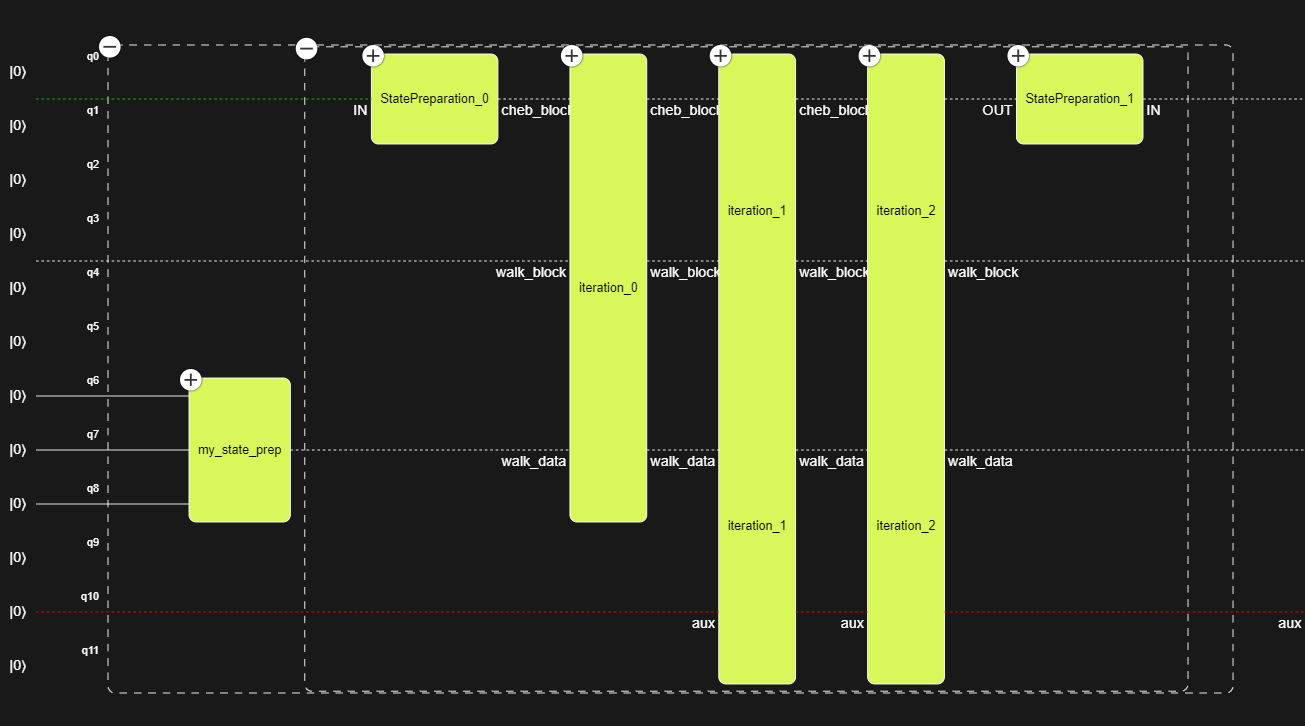

In [80]:
results = execute(qprog).result()

In [81]:
state_result = get_projected_state_vector(
    results, "data", {"exp_block": 0.0, "ham_block": 0.0}
)

In [82]:
expected_state = (
    1 / normalization_exp * scipy.linalg.expm(1j * matrix * EVOLUTION_TIME) @ (U_matrix @ amps)
)
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(
    1j * relative_phase
)  # rotate according to a global phase
print("expected state:", expected_state)
print("resulting state:", state_result)
assert np.linalg.norm(state_result - expected_state) < EPS

expected state: [0.26201711+0.j         0.41650964+0.j         0.        +0.j
 0.        +0.j         0.        +0.11168446j 0.        -0.00963653j
 0.        +0.12531257j 0.        +0.j        ]
resulting state: [ 2.61551791e-01-4.14861417e-17j  4.15147572e-01-5.31695560e-15j
 -1.32784030e-15-3.71736426e-17j -5.59626994e-16+1.69901637e-15j
 -3.65441211e-15+9.80887813e-02j  1.97983798e-15-7.42364710e-03j
  1.21697879e-15+1.08587404e-01j -7.45397627e-16-1.69334118e-15j]


In [83]:
print(
    "overlap between expected and resulting state:",
    np.abs(np.vdot(state_result, expected_state))
    * normalization_exp
    / np.linalg.norm(state_result),
)

overlap between expected and resulting state: 0.9992324816589931


#### Optimizing the circuit

##### Optimize for depth

In [86]:
qmod_with_constraints = set_constraints(
    qmod, Constraints(optimization_parameter="depth")
)

In [87]:
write_qmod(qmod, "hamiltonian_simulation_qubitization_2_oscillators_optimized_depth", decimal_precision=12)

In [41]:
qprog = synthesize(qmod_with_constraints)
show(qprog)

Opening: https://platform.classiq.io/circuit/ab717d9f-1888-44a8-af06-793781816c0b?version=0.44.0


In [95]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 12 and the circuit_depth is 8829


##### Circuit Obtained


##### Optimize for width

In [99]:
qmod_with_constraints = set_constraints(
    qmod, Constraints(optimization_parameter="width")
)

In [50]:
write_qmod(qmod, "hamiltonian_simulation_qubitization_2_oscillators_optimized_width", decimal_precision=12)

In [44]:
qprog = synthesize(qmod_with_constraints)
show(qprog)

Opening: https://platform.classiq.io/circuit/8438db51-96b9-48ce-93b1-0d280f2a5c26?version=0.44.0


#### Comparative Analysis

| S.No | Method | Width | Depth | U | CX |
|---|---|---|---|---|---|
| 1. | Default | 12 | 7886 | 5817 | 5507 | 
| 2. | Optimize Width | 10 | 14628 | 11013 | 10347 |
| 3. | Optimize Depth | 267 | 4433 | 4100 | 3555 |

We see that while optimizing for width reduces the number of qubits by 2 for a two-fold increase in depth, the number of qubits used to reduce depth by a factor of 2 is extremely large (267).

**Remarks**: The ratio of the spring constants over the masses plays a crucial role in the running time. We find that for fixed spring constant values $\kappa_{11}=\kappa_{22}=9, \kappa_{12}=\kappa_{21}=4$, running with mass values < 1000 (say 10 or even 100) resulted in a timeout error during the synthesize function call. We have therefore used a value of 1000 to generate the circuits and demonstrate the correctness of our code